In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks/
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [ ]:
# i-download muna natin ang mga mahahalagang kagamitan (utilities)
!pip install d2l # ito ang pangunahing library na gagamitin natin
!pip install mxnet-cu101 # importante yung -cu101 para compatible sa gpu
import collections, re, math
from d2l import mxnet as d2l
from mxnet import autograd, gluon, np, npx
from mxnet.gluon import nn, rnn
%matplotlib inline

     |████████████████████████████████| 92kB 3.0MB/s 
     |████████████████████████████████| 356.7MB 44kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
# pagpapaandar (function) upang magbasa ng talaan (.txt file)
def read_txt(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]
lines = read_txt('train.txt') + read_txt('valid.txt') + read_txt('test.txt') + read_txt('fakenews.txt')
print(f'# text lines: {len(lines)}')
print(lines[900])
print(lines[10000])
print(lines[500000])

# text lines: 2527778
ang isang maliwanag na kwantitatibong pagtukoy ng kawalang kaigihang ito ang rate ng entropiya ng kromosomang y samantalang ang ibang mga kromosoma ng genome ng tao ay mga mga rate ng entropiya ng mga bit kada nucleotide kumpara sa teoretikal na maksimum na eksaktong para sa kawalang pag ulit ang rate ng entropiya ng kromosomang y ay lamang
isang tradisyunal o nakagawiang kultura ang panliligaw ng isang lalaki upang maipahayag niya ang kanyang damdamin para sa babaeng kanyang iniibig
ayon kay richard dawkins kung may isang hippopotamus o kuneho na natagpuan sa panahong cambrian ito ay kumpletong tatalo sa ebolusyon


In [ ]:
# gagawin nating token ang bawat salita sa kabuuan ng talaan (.txt file)
tokens = d2l.tokenize(lines)
for i in [900,10000,500000]:
    print(tokens[i])

['ang', 'isang', 'maliwanag', 'na', 'kwantitatibong', 'pagtukoy', 'ng', 'kawalang', 'kaigihang', 'ito', 'ang', 'rate', 'ng', 'entropiya', 'ng', 'kromosomang', 'y', 'samantalang', 'ang', 'ibang', 'mga', 'kromosoma', 'ng', 'genome', 'ng', 'tao', 'ay', 'mga', 'mga', 'rate', 'ng', 'entropiya', 'ng', 'mga', 'bit', 'kada', 'nucleotide', 'kumpara', 'sa', 'teoretikal', 'na', 'maksimum', 'na', 'eksaktong', 'para', 'sa', 'kawalang', 'pag', 'ulit', 'ang', 'rate', 'ng', 'entropiya', 'ng', 'kromosomang', 'y', 'ay', 'lamang']
['isang', 'tradisyunal', 'o', 'nakagawiang', 'kultura', 'ang', 'panliligaw', 'ng', 'isang', 'lalaki', 'upang', 'maipahayag', 'niya', 'ang', 'kanyang', 'damdamin', 'para', 'sa', 'babaeng', 'kanyang', 'iniibig']
['ayon', 'kay', 'richard', 'dawkins', 'kung', 'may', 'isang', 'hippopotamus', 'o', 'kuneho', 'na', 'natagpuan', 'sa', 'panahong', 'cambrian', 'ito', 'ay', 'kumpletong', 'tatalo', 'sa', 'ebolusyon']


In [ ]:
# gagawa tayo ng corpus o pangkalahatan ng mga salita o token na matatagpuan sa talaan (.txt file)
corpus = [token for line in tokens for token in line]
len(corpus)

45854229

In [ ]:
# bibigyan natin ng numero ang bawat natatanging salita o token sa corpus
vocab = d2l.Vocab(corpus)
print(list(vocab.token_to_idx.items())[:20])
len(vocab)

[('<unk>', 0), ('ng', 1), ('sa', 2), ('ang', 3), ('na', 4), ('mga', 5), ('ay', 6), ('at', 7), ('isang', 8), ('o', 9), ('ito', 10), ('ni', 11), ('si', 12), ('may', 13), ('noong', 14), ('bilang', 15), ('hindi', 16), ('mula', 17), ('kung', 18), ('para', 19)]


239452

In [ ]:
# upang magamitan ng matematika, kailangan nating i-convert ang bawat salita o token sa talaan sa katumbas nitong numero ayon sa bokabularyo (vocabulary)
for i in [900, 10000, 500000]:
    print('words:', tokens[i])
    print('indices:', vocab[tokens[i]])

words: ['ang', 'isang', 'maliwanag', 'na', 'kwantitatibong', 'pagtukoy', 'ng', 'kawalang', 'kaigihang', 'ito', 'ang', 'rate', 'ng', 'entropiya', 'ng', 'kromosomang', 'y', 'samantalang', 'ang', 'ibang', 'mga', 'kromosoma', 'ng', 'genome', 'ng', 'tao', 'ay', 'mga', 'mga', 'rate', 'ng', 'entropiya', 'ng', 'mga', 'bit', 'kada', 'nucleotide', 'kumpara', 'sa', 'teoretikal', 'na', 'maksimum', 'na', 'eksaktong', 'para', 'sa', 'kawalang', 'pag', 'ulit', 'ang', 'rate', 'ng', 'entropiya', 'ng', 'kromosomang', 'y', 'ay', 'lamang']
indices: [3, 8, 1232, 4, 19428, 1491, 1, 1050, 14620, 10, 3, 1117, 1, 13946, 1, 2267, 129, 291, 3, 32, 5, 2257, 1, 2776, 1, 23, 6, 5, 5, 1117, 1, 13946, 1, 5, 9273, 749, 6936, 2241, 2, 3865, 4, 13643, 4, 2747, 19, 2, 1050, 24, 735, 3, 1117, 1, 13946, 1, 2267, 129, 6, 37]
words: ['isang', 'tradisyunal', 'o', 'nakagawiang', 'kultura', 'ang', 'panliligaw', 'ng', 'isang', 'lalaki', 'upang', 'maipahayag', 'niya', 'ang', 'kanyang', 'damdamin', 'para', 'sa', 'babaeng', 'kanyang

In [ ]:
# silipin natin kung anong mga salita sa bokabularyo (vocabulary) ang pinakamadalas lumabas, pati ang bilang nito sa corpus
vocab.token_freqs[:20]

[('ng', 3266777),
 ('sa', 2848418),
 ('ang', 2391918),
 ('na', 2130090),
 ('mga', 1960041),
 ('ay', 1258656),
 ('at', 1148973),
 ('isang', 607821),
 ('o', 495616),
 ('ito', 383872),
 ('ni', 292592),
 ('si', 265075),
 ('may', 248712),
 ('noong', 232213),
 ('bilang', 213726),
 ('hindi', 209466),
 ('mula', 156179),
 ('kung', 138572),
 ('para', 137480),
 ('siya', 118382)]

In [ ]:
# silipin natin kung anong mga bi-gram (dalawang magkasunod na salita) ang pinakamadalas lumabas, pati ang bilang nito, sa corpus
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:20]

[(('ng', 'mga'), 556481),
 (('ang', 'mga'), 392514),
 (('sa', 'mga'), 367676),
 (('ay', 'isang'), 149099),
 (('ito', 'ay'), 135185),
 (('ng', 'isang'), 128137),
 (('mula', 'sa'), 121591),
 (('para', 'sa'), 109305),
 (('na', 'ang'), 101200),
 (('sa', 'isang'), 96592),
 (('at', 'ang'), 91322),
 (('na', 'mga'), 83232),
 (('ay', 'ang'), 82876),
 (('na', 'may'), 72559),
 (('at', 'mga'), 68374),
 (('ang', 'isang'), 67165),
 (('sa', 'pamamagitan'), 61040),
 (('pamamagitan', 'ng'), 59020),
 (('dahil', 'sa'), 56175),
 (('ayon', 'sa'), 52642)]

In [ ]:
# silipin natin kung anong mga tri-gram (tatlong magkakasunod na salita) ang pinakamadalas lumabas, pati ang bilang nito, sa corpus
trigram_tokens = [
    triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:20]

[(('sa', 'pamamagitan', 'ng'), 58867),
 (('sa', 'loob', 'ng'), 34267),
 (('sa', 'pagitan', 'ng'), 31672),
 (('iba', 't', 'ibang'), 26571),
 (('para', 'sa', 'mga'), 25526),
 (('lahat', 'ng', 'mga'), 23005),
 (('iba', 'pang', 'mga'), 21375),
 (('ang', 'mga', 'ito'), 19854),
 (('na', 'ang', 'mga'), 18740),
 (('kung', 'saan', 'ang'), 18284),
 (('na', 'ito', 'ay'), 17782),
 (('mula', 'sa', 'mga'), 16847),
 (('isa', 'sa', 'mga'), 16415),
 (('at', 'ang', 'mga'), 15197),
 (('sa', 'ilalim', 'ng'), 13799),
 (('ng', 'mga', 'tao'), 13541),
 (('ang', 'lahat', 'ng'), 13350),
 (('sa', 'lahat', 'ng'), 12664),
 (('mga', 'ito', 'ay'), 12647),
 (('at', 'iba', 'pang'), 12250)]

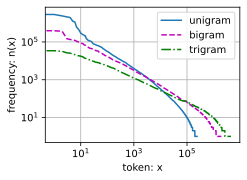

In [ ]:
# gawan natin ng grapiko sa kung paanong umoonti ang dalas ng salita/bi-gram/tri-gram; ibig sabihin, mayroong mga madalas lumabas at pabihira nang pabihira
freqs = [freq for token, freq in vocab.token_freqs]
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

In [ ]:
# sa ikalawang bahagi, subukan naman natin kung ang token ay bawat karakter at hindi salita (mas madalas ginagawa ito dahil kapag ang token ay bawat salita, magiging napakarami ng bokabularyo (halimbawa: 228739), samantalang kung karakter ay 28 lamang)
tokens = d2l.tokenize(lines, 'char')
for i in [900,10000,500000]:
    print(tokens[i])

['a', 'n', 'g', ' ', 'i', 's', 'a', 'n', 'g', ' ', 'm', 'a', 'l', 'i', 'w', 'a', 'n', 'a', 'g', ' ', 'n', 'a', ' ', 'k', 'w', 'a', 'n', 't', 'i', 't', 'a', 't', 'i', 'b', 'o', 'n', 'g', ' ', 'p', 'a', 'g', 't', 'u', 'k', 'o', 'y', ' ', 'n', 'g', ' ', 'k', 'a', 'w', 'a', 'l', 'a', 'n', 'g', ' ', 'k', 'a', 'i', 'g', 'i', 'h', 'a', 'n', 'g', ' ', 'i', 't', 'o', ' ', 'a', 'n', 'g', ' ', 'r', 'a', 't', 'e', ' ', 'n', 'g', ' ', 'e', 'n', 't', 'r', 'o', 'p', 'i', 'y', 'a', ' ', 'n', 'g', ' ', 'k', 'r', 'o', 'm', 'o', 's', 'o', 'm', 'a', 'n', 'g', ' ', 'y', ' ', 's', 'a', 'm', 'a', 'n', 't', 'a', 'l', 'a', 'n', 'g', ' ', 'a', 'n', 'g', ' ', 'i', 'b', 'a', 'n', 'g', ' ', 'm', 'g', 'a', ' ', 'k', 'r', 'o', 'm', 'o', 's', 'o', 'm', 'a', ' ', 'n', 'g', ' ', 'g', 'e', 'n', 'o', 'm', 'e', ' ', 'n', 'g', ' ', 't', 'a', 'o', ' ', 'a', 'y', ' ', 'm', 'g', 'a', ' ', 'm', 'g', 'a', ' ', 'r', 'a', 't', 'e', ' ', 'n', 'g', ' ', 'e', 'n', 't', 'r', 'o', 'p', 'i', 'y', 'a', ' ', 'n', 'g', ' ', 'm', 'g', 'a',

In [ ]:
# bibigyan natin ng numero ang bawat karakter sa corpus, at malalamang 28 nga lang ang bilang ng bokabularyo (bawat karakter sa alpabeto)
vocab = d2l.Vocab(tokens)
print(list(vocab.token_to_idx.items())[:20])
len(vocab)

[('<unk>', 0), ('a', 1), (' ', 2), ('n', 3), ('g', 4), ('i', 5), ('s', 6), ('o', 7), ('t', 8), ('l', 9), ('m', 10), ('p', 11), ('k', 12), ('u', 13), ('r', 14), ('e', 15), ('y', 16), ('b', 17), ('d', 18), ('h', 19)]


28

In [ ]:
# silipin natin kung anong mga karakter ang pinakamadalas lumabas, pati ang bilang nito sa corpus
vocab.token_freqs[:20]

[('a', 52870396),
 (' ', 43686047),
 ('n', 30326012),
 ('g', 21608812),
 ('i', 18868235),
 ('s', 12700481),
 ('o', 11369243),
 ('t', 10751415),
 ('l', 9904486),
 ('m', 9162735),
 ('p', 7660373),
 ('k', 7422389),
 ('u', 7175153),
 ('r', 6625030),
 ('e', 6516933),
 ('y', 6087168),
 ('b', 4844950),
 ('d', 4148611),
 ('h', 4065738),
 ('w', 1876154)]

In [ ]:
# idiretso na natin na ang corpus natin ay ang numero ng bawat karakter
corpus = [vocab[token] for line in tokens for token in line]
len(corpus)

280406124

In [ ]:
# dahil sobrang dami, siguro gamitin lang muna natin ang unang isang milyon
corpus = corpus[:1000000]
len(corpus)

1000000

In [ ]:
# ihahanda na natin ang iterator para sa pag-ensayo (training) ng karugtungan ng mga kilig kilig (neural network)
class SeqDataLoader:
    def __init__(self, batch_size, num_steps, corpus, vocab):
        self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab, self.batch_size, self.num_steps = corpus, vocab, batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)
npx.set_np()
batch_size, num_steps = 32, 35
train_iter = SeqDataLoader(batch_size, num_steps, corpus, vocab)

In [ ]:
# kinuha ko yung train function sa library ng d2l at may mga binago
def train_and_predict(net, train_iter, vocab, lr, num_epochs, device, use_random_iter=False):
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity', legend=['train'], xlim=[10, num_epochs])
    if isinstance(net, gluon.Block):
        net.initialize(ctx=device, force_reinit=True, init=d2l.init.Normal(0.01))
        trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
        updater = lambda batch_size: trainer.step(batch_size)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: d2l.predict_ch8(prefix, 300, net, vocab, device)
    for epoch in range(num_epochs):
        ppl, speed = d2l.train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            animator.add(epoch + 1, [ppl])
    print(f'perplexity {ppl:.1f}, {speed:.1f} tokens/sec on {str(device)}','\n')
    print(predict('isang araw nagising ako at may nakitang '),'\n')
    print(predict('minekaniko ni monica ang makina ng '),'\n')
    print(predict('mula noong sakupin ng mga kastila ang arkipelago ng pilipinas ay hindi na muling '))

In [ ]:
# ididisenyo natin ang labis na parametro (hyperparameter) ng pag-ensayo (training) ng ating karugtungan ng mga kilig kilig (neural network)
num_hiddens, num_epochs, lr = 256, 500, 1
device = d2l.try_gpu()

perplexity 3.3, 177274.0 tokens/sec on gpu(0) 

isang araw nagising ako at may nakitang magkakaisang pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga 

minekaniko ni monica ang makina ng mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakai 

mula noong sakupin ng mga kastila ang arkipelago ng pilipinas ay hindi na muling pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba sa mga pagkakaiba

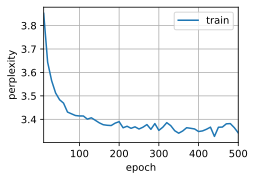

In [ ]:
# ihanda natin ang ordinaryong paulit-ulit na karugtungan ng mga kilig-kilig (recurrent neural network), mag-ensayo (train), at manghula (predict)
rnn_layer = rnn.RNN(num_hiddens)
model = d2l.RNNModel(rnn_layer, len(vocab))
train_and_predict(model, train_iter, vocab, lr, num_epochs, device)

perplexity 2.6, 168084.8 tokens/sec on gpu(0) 

isang araw nagising ako at may nakitang nagsisimula sa pagitan ng mga pagkakaiba sa isang pagkakasunud sunod na tumatakbo sa isang paraan ng pagkakaroon ng isang sistemang ito ay isang pamilihang pang estadistika ang pagkakasunud sunod na tumataas ng mga electron ay isang pamilihang pang estadistika ang pagkakasunud sunod na tumataas ng m 

minekaniko ni monica ang makina ng mga electron ay isang pamilihang pang estadistika ang pagkakasunud sunod na tumataas ng mga electron ay isang pamilihang pang estadistika ang pagkakasunud sunod na tumataas ng mga electron ay isang pamilihang pang estadistika ang pagkakasunud sunod na tumataas ng mga electron ay isang pamilihang pan 

mula noong sakupin ng mga kastila ang arkipelago ng pilipinas ay hindi na muling nag aangkin ng mga pagkakaiba sa isang pagkakasunud sunod na tumatakbo sa isang paraan ng pagkakaroon ng isang sistemang ito ay isang pamilihang pang estadistika ang pagkakasunud sunod na tu

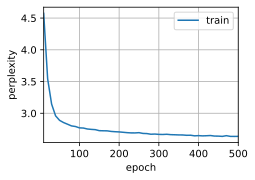

In [ ]:
# ihanda natin ang may harang na paulit-ulit na batayang sukat (gated recurrent unit), mag-ensayo (train), at manghula (predict)
gru_layer = rnn.GRU(num_hiddens)
model = d2l.RNNModel(gru_layer, len(vocab))
train_and_predict(model, train_iter, vocab, lr, num_epochs, device)

perplexity 2.3, 164887.9 tokens/sec on gpu(0) 

isang araw nagising ako at may nakitang ang mga ito ay naging katangian ng pagkakaroon ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba  

minekaniko ni monica ang makina ng mga pagkakaiba ay mas malaki kaya ang tanging mga pagkakaiba sa pagitan ng dalawang tao na may karaniwan sa mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga  

mula noong sakupin ng mga kastila ang arkipelago ng pilipinas ay hindi na muling pangkalahatan ang mga sintomas ay karaniwang nagreresulta sa kalaunanmay na may kaugnayan sa mga ito ay naging katangian ng pagkakaroon ng mga pagkakaiba sa pagitan ng mga probinsiya ng mga 

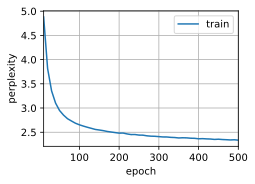

In [ ]:
# ihanda natin ang mahabang maikling alaala (long short-term memory), mag-ensayo (train), at manghula (predict)
lstm_layer = rnn.LSTM(num_hiddens)
model = d2l.RNNModel(lstm_layer, len(vocab))
train_and_predict(model, train_iter, vocab, lr, num_epochs, device)

perplexity 1.5, 128977.5 tokens/sec on gpu(0) 

isang araw nagising ako at may nakitang dumatay na sede ni homerang mga stigmata ni zeskapritang kataas na sakuna na nagsilabas ng nagbabalikang pangkalusugan at kalinangan ng litong amerika na dapat ipalaki at ang institute of cotories at dopamsunod na si chrimansi charter na nangangahulugang mga table ng isang bilang ng namamatay ay maa 

minekaniko ni monica ang makina ng dagat pulcuna ang isang bagay na ito ay dahil sa tulangan si pikachu sa isang sagi ng radiasyonsang angkan ng paligsahan ng mga pelikula at telebisyon ng araw tompage ng amoy sa ilalim ng pamahalaan sa sakitang isa sa mga pinakamagaling na analpsatika at asurrayuilidad ng batas ni buddha ay naglahat 

mula noong sakupin ng mga kastila ang arkipelago ng pilipinas ay hindi na muling hanayan sa molecular frenthamito ay maaaring sinusukat sa pamamagitan ng paglalakbay ay nag aaral na ito ay kinabibilangan ng mga diyos at diyosa gamit ang isang taong naghahanap ng parehong

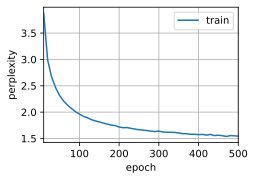

In [ ]:
# mukhang ayos ang mahabang maikling alaala (long short-term memory) pero dagdagan natin ng isa pang payong (layer), at muling mag-ensayo (train), at manghula (predict), mukhang kelangan ding baguhin ang bilis ng pagkatuto (learning rate)
num_layers, lr = 2, 2
lstm_layer = rnn.LSTM(num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
train_and_predict(model, train_iter, vocab, lr, num_epochs, device)